In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [9]:
def regression_results(y_true, y_pred, regr_type):
  ev = explained_variance_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true,y_pred)

  print("Evaluation metrics for" + regr_type + 'Linear Regression')
  print("Explained_variance ", round(ev,4))
  print("Mean_absolute_error ", round(mae,4))
  print("Mean_squared_error ", round(mse,4))
  print("R2_score ", round(r2,4))
  print("RMSE: ",round(np.sqrt(mse),4))
  print()

In [10]:
# Generate synthetic data
noise=1
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + noise*np.random.randn(1000, 1)  # Linear relationship with some noise
y_ideal =  4 + 3 * X
# Specify the portion of the dataset to add outliers (e.g., the last 20%)
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5  # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten() > threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5  # Number of outliers to add
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

# Modify the target values at these indices to create outliers (add significant noise)
y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

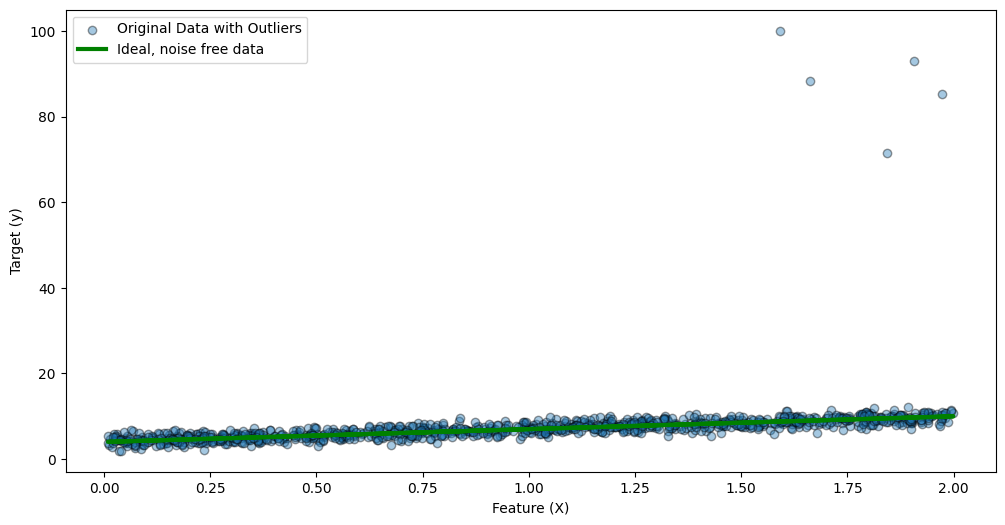

In [11]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y_outlier, alpha=0.4,ec='k', label='Original Data with Outliers')
plt.plot(X, y_ideal,  linewidth=3, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()


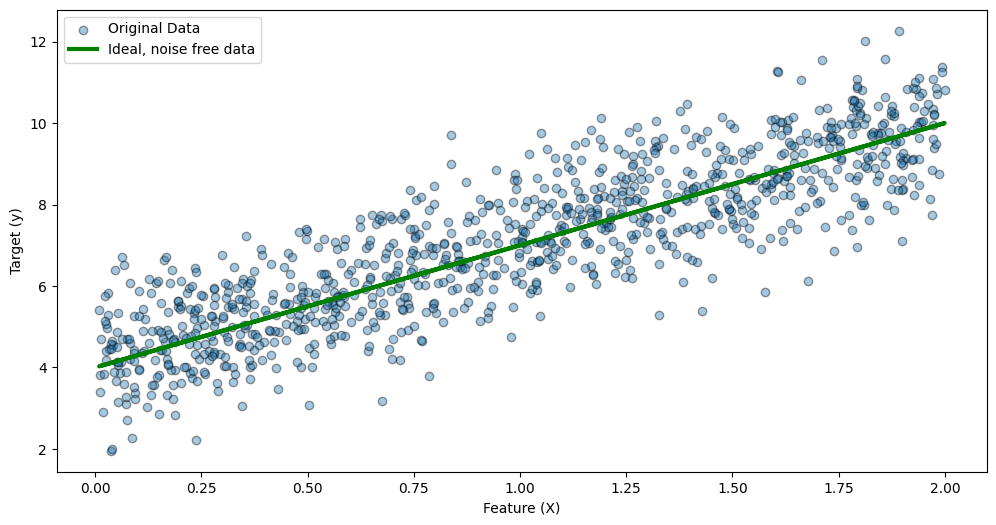

In [12]:
plt.figure(figsize=(12,6))

plt.scatter(X,y,alpha=0.4,ec='k',label='Original Data')
plt.plot(X,y_ideal,linewidth=3,color='g',label='Ideal, noise free data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X,y_outlier)
y_outlier_pred_lin = lin_reg.predict(X)

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X,y_outlier)
y_outlier_pred_ridge = ridge_reg.predict(X)

lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X,y_outlier)
y_outlier_pred_lasso = lasso_reg.predict(X)

In [14]:
regression_results(y, y_outlier_pred_lin, 'Ordinary')
regression_results(y, y_outlier_pred_ridge, 'Ridge')
regression_results(y, y_outlier_pred_lasso, 'Lasso')

Evaluation metrics forOrdinaryLinear Regression
Explained_variance  0.6748
Mean_absolute_error  0.9468
Mean_squared_error  1.4164
R2_score  0.6357
RMSE:  1.1901

Evaluation metrics forRidgeLinear Regression
Explained_variance  0.6766
Mean_absolute_error  0.9443
Mean_squared_error  1.4094
R2_score  0.6375
RMSE:  1.1872

Evaluation metrics forLassoLinear Regression
Explained_variance  0.7394
Mean_absolute_error  0.8597
Mean_squared_error  1.1651
R2_score  0.7003
RMSE:  1.0794



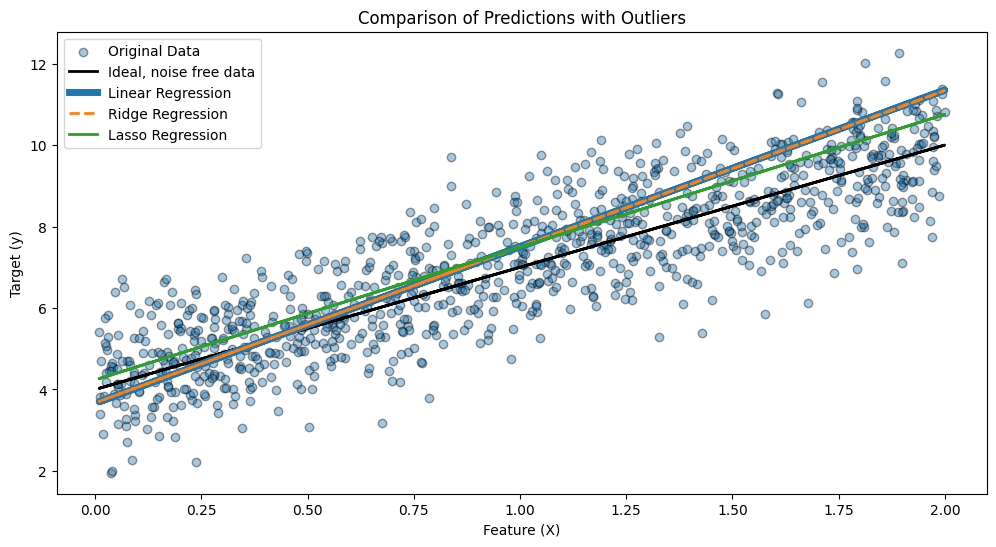

In [15]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_outlier_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_outlier_pred_ridge, linestyle='--', linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_outlier_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Predictions with Outliers')
plt.legend()
plt.show()

Evaluation metrics forOrdinaryLinear Regression
Explained_variance  0.7492
Mean_absolute_error  0.7873
Mean_squared_error  0.975
R2_score  0.7492
RMSE:  0.9874

Evaluation metrics forRidgeLinear Regression
Explained_variance  0.7492
Mean_absolute_error  0.7874
Mean_squared_error  0.975
R2_score  0.7492
RMSE:  0.9874

Evaluation metrics forLassoLinear Regression
Explained_variance  0.7191
Mean_absolute_error  0.8408
Mean_squared_error  1.0923
R2_score  0.7191
RMSE:  1.0451



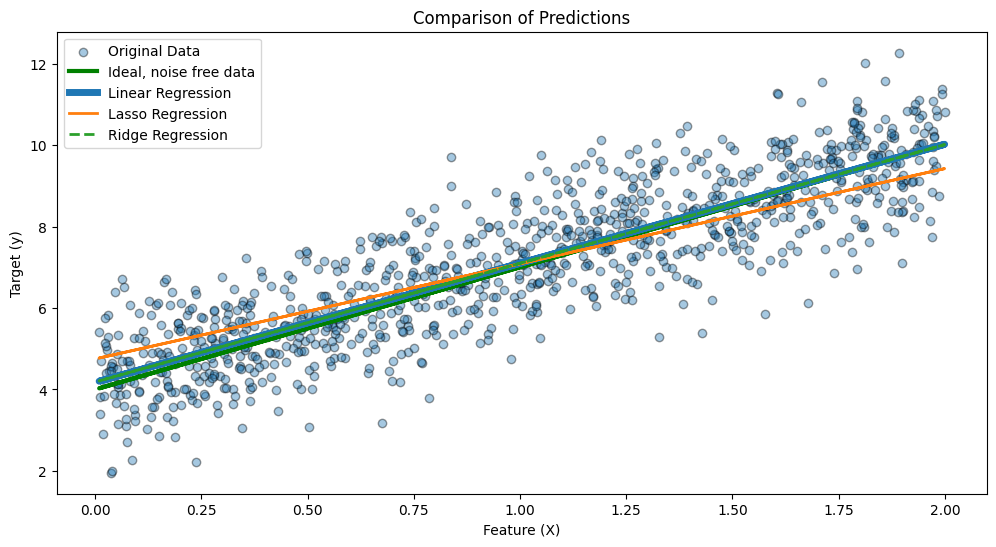

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_pred_lin = lin_reg.predict(X)

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X,y)
y_pred_ridge = ridge_reg.predict(X)

lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X,y)
y_pred_lasso = lasso_reg.predict(X)

regression_results(y, y_pred_lin, 'Ordinary')
regression_results(y, y_pred_ridge, 'Ridge')
regression_results(y, y_pred_lasso, 'Lasso')

plt.figure(figsize=(12, 6))

plt.scatter(X,y,alpha=0.4,ec='k',label='Original Data')
plt.plot(X,y_ideal,linewidth=3,color='g',label='Ideal, noise free data')
plt.plot(X,y_pred_lin,linewidth=5,label='Linear Regression')
plt.plot(X,y_pred_lasso,linewidth=2,label='Lasso Regression')
plt.plot(X,y_pred_ridge,linestyle='--',linewidth=2,label='Ridge Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Predictions')
plt.legend()
plt.show()

In [17]:
from sklearn.datasets import make_regression

X, y, ideal_coef = make_regression(n_samples=100, n_features=100, n_informative=10, noise=10, random_state=42, coef=True)

# Get the ideal predictions based on the informative coefficients used in the regression model
ideal_predictions = X @ ideal_coef

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, ideal_train, ideal_test = train_test_split(X, y, ideal_predictions, test_size=0.3, random_state=42)

In [18]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
linear = LinearRegression()

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_linear = linear.predict(X_test)

In [19]:
regression_results(y_test, y_pred_lasso, 'Lasso')
regression_results(y_test, y_pred_ridge, 'Ridge')
regression_results(y_test, y_pred_linear,'Ordinary')

Evaluation metrics forLassoLinear Regression
Explained_variance  0.9815
Mean_absolute_error  13.8855
Mean_squared_error  304.644
R2_score  0.9815
RMSE:  17.4541

Evaluation metrics forRidgeLinear Regression
Explained_variance  0.4365
Mean_absolute_error  77.6493
Mean_squared_error  9830.7687
R2_score  0.4027
RMSE:  99.1502

Evaluation metrics forOrdinaryLinear Regression
Explained_variance  0.4354
Mean_absolute_error  77.7353
Mean_squared_error  9844.2714
R2_score  0.4018
RMSE:  99.2183



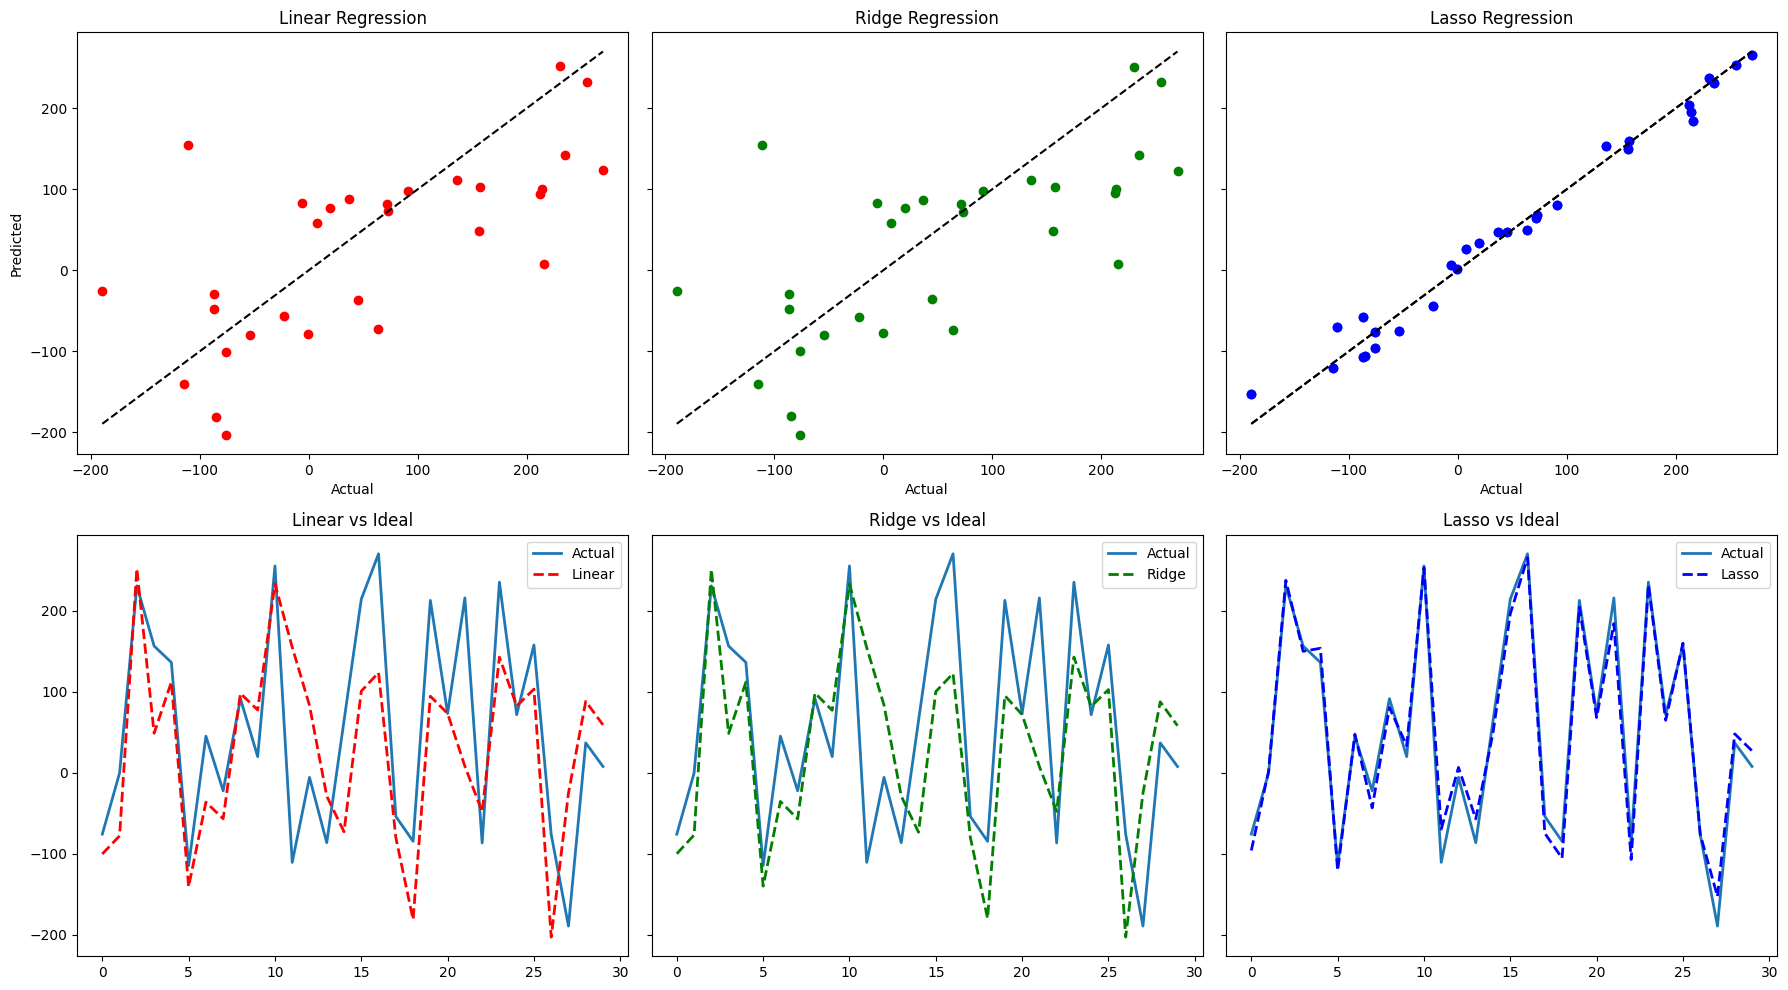

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression")
axes[0,0].set_xlabel("Actual",)
axes[0,0].set_ylabel("Predicted",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)

axes[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)


# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(y_pred_linear, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()

axes[1,1].plot(y_test, label="Actual", lw=2)
# axes[1,1].plot(ideal_test, '--', label="Ideal", lw=2, color="purple")
axes[1,1].plot(y_pred_ridge, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()

axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(y_pred_lasso, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()

plt.tight_layout()
plt.show()

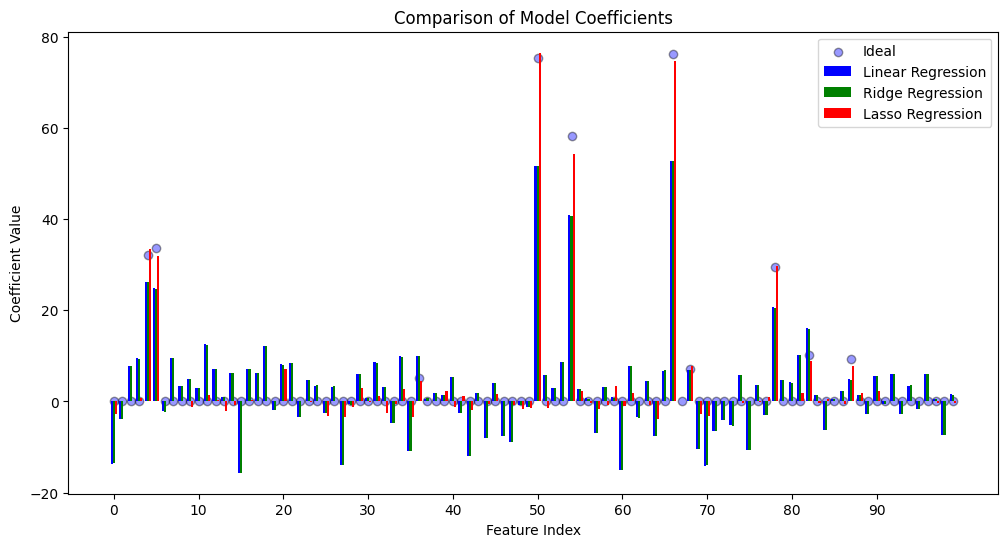

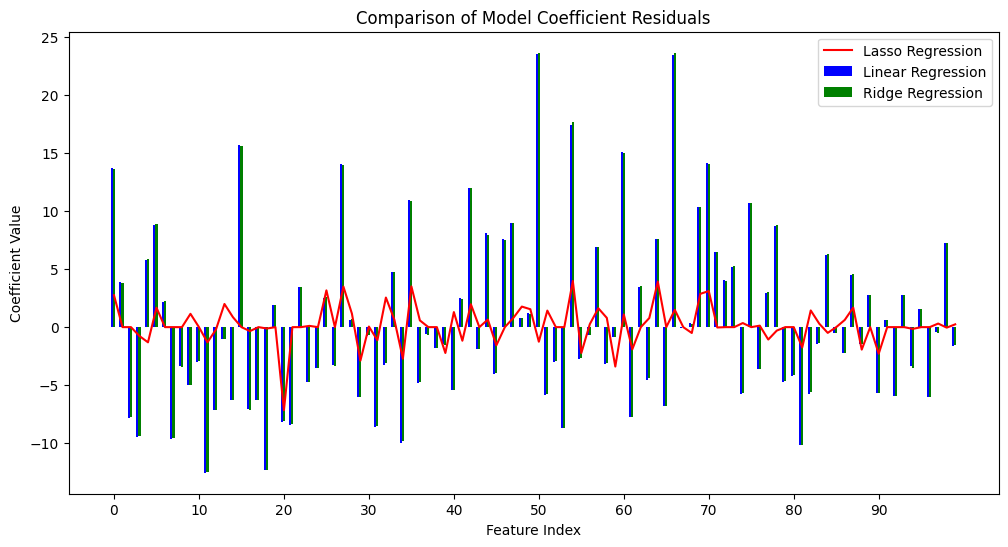

In [21]:
# Model coefficients
linear_coeff = linear.coef_
ridge_coeff = ridge.coef_
lasso_coeff = lasso.coef_


# Plot the coefficients
x_axis = np.arange(len(linear_coeff))
x_labels = np.arange(min(x_axis),max(x_axis),10)
plt.figure(figsize=(12, 6))

plt.scatter(x_axis, ideal_coef,  label='Ideal', color='blue', ec='k', alpha=0.4)
plt.bar(x_axis - 0.25, linear_coeff, width=0.25, label='Linear Regression', color='blue')
plt.bar(x_axis, ridge_coeff, width=0.25, label='Ridge Regression', color='green')
plt.bar(x_axis + 0.25, lasso_coeff, width=0.25, label='Lasso Regression', color='red')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.xticks(x_labels)
plt.legend()
plt.show()


# Plot the coefficient residuals
x_axis = np.arange(len(linear_coeff))

plt.figure(figsize=(12, 6))

plt.bar(x_axis - 0.25, ideal_coef - linear_coeff, width=0.25, label='Linear Regression', color='blue')
plt.bar(x_axis, ideal_coef - ridge_coeff, width=0.25, label='Ridge Regression', color='green')
# plt.bar(x_axis + 0.25, ideal_coef - lasso_coeff, width=0.25, label='Lasso Regression', color='red')
plt.plot(x_axis, ideal_coef - lasso_coeff, label='Lasso Regression', color='red')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficient Residuals')
plt.xticks(x_labels)
plt.legend()
plt.show()

In [24]:
threshold = 5

feature_importance_df = pd.DataFrame({
    'Lasso Coefficient': lasso_coeff,
    'Ideal Coefficient': ideal_coef
})

feature_importance_df['Feature Selected'] = feature_importance_df['Lasso Coefficient'].abs() > threshold

print("Features Identified as Important:")
print(feature_importance_df[feature_importance_df['Feature Selected']])

print("\n Nonzero Ideal Coefficient Indices")
display(feature_importance_df[feature_importance_df['Ideal Coefficient']>0])

Features Identified as Important:
    Lasso Coefficient  Ideal Coefficient  Feature Selected
4           33.435088          32.125517              True
5           32.014793          33.692687              True
20           7.163636           0.000000              True
50          76.576829          75.319970              True
54          54.306360          58.286936              True
66          74.841971          76.330808              True
68           7.685653           7.180755              True
78          29.735685          29.434817              True
82           8.864669          10.301919              True
87           7.745131           9.427598              True

 Nonzero Ideal Coefficient Indices


,Lasso Coefficient,Ideal Coefficient,Feature Selected
4,33.435088,32.125517,True
5,32.014793,33.692687,True
36,4.588118,5.166218,False
50,76.576829,75.319970,True
54,54.306360,58.286936,True
66,74.841971,76.330808,True
68,7.685653,7.180755,True
78,29.735685,29.434817,True
82,8.864669,10.301919,True
87,7.745131,9.427598,True


In [25]:
important_features = feature_importance_df[feature_importance_df['Feature Selected']].index

In [28]:
X_filtered = X[:,important_features]
print("Shape of filtered feature set: ",X_filtered.shape)

X_train , X_test , y_train , y_test = train_test_split(X_filtered,y,test_size=0.3,random_state=42)

Shape of filtered feature set:  (100, 10)


In [30]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
linear = LinearRegression()

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_linear = linear.predict(X_test)

In [31]:
regression_results(y_test , y_pred_lasso , 'Lasso')
regression_results(y_test , y_pred_ridge,'Ridge')
regression_results(y_test , y_pred_linear,'Ordinary')

Evaluation metrics forLassoLinear Regression
Explained_variance  0.9917
Mean_absolute_error  9.6928
Mean_squared_error  140.803
R2_score  0.9914
RMSE:  11.866

Evaluation metrics forRidgeLinear Regression
Explained_variance  0.9917
Mean_absolute_error  9.6928
Mean_squared_error  140.8636
R2_score  0.9914
RMSE:  11.8686

Evaluation metrics forOrdinaryLinear Regression
Explained_variance  0.9917
Mean_absolute_error  9.653
Mean_squared_error  139.4874
R2_score  0.9915
RMSE:  11.8105



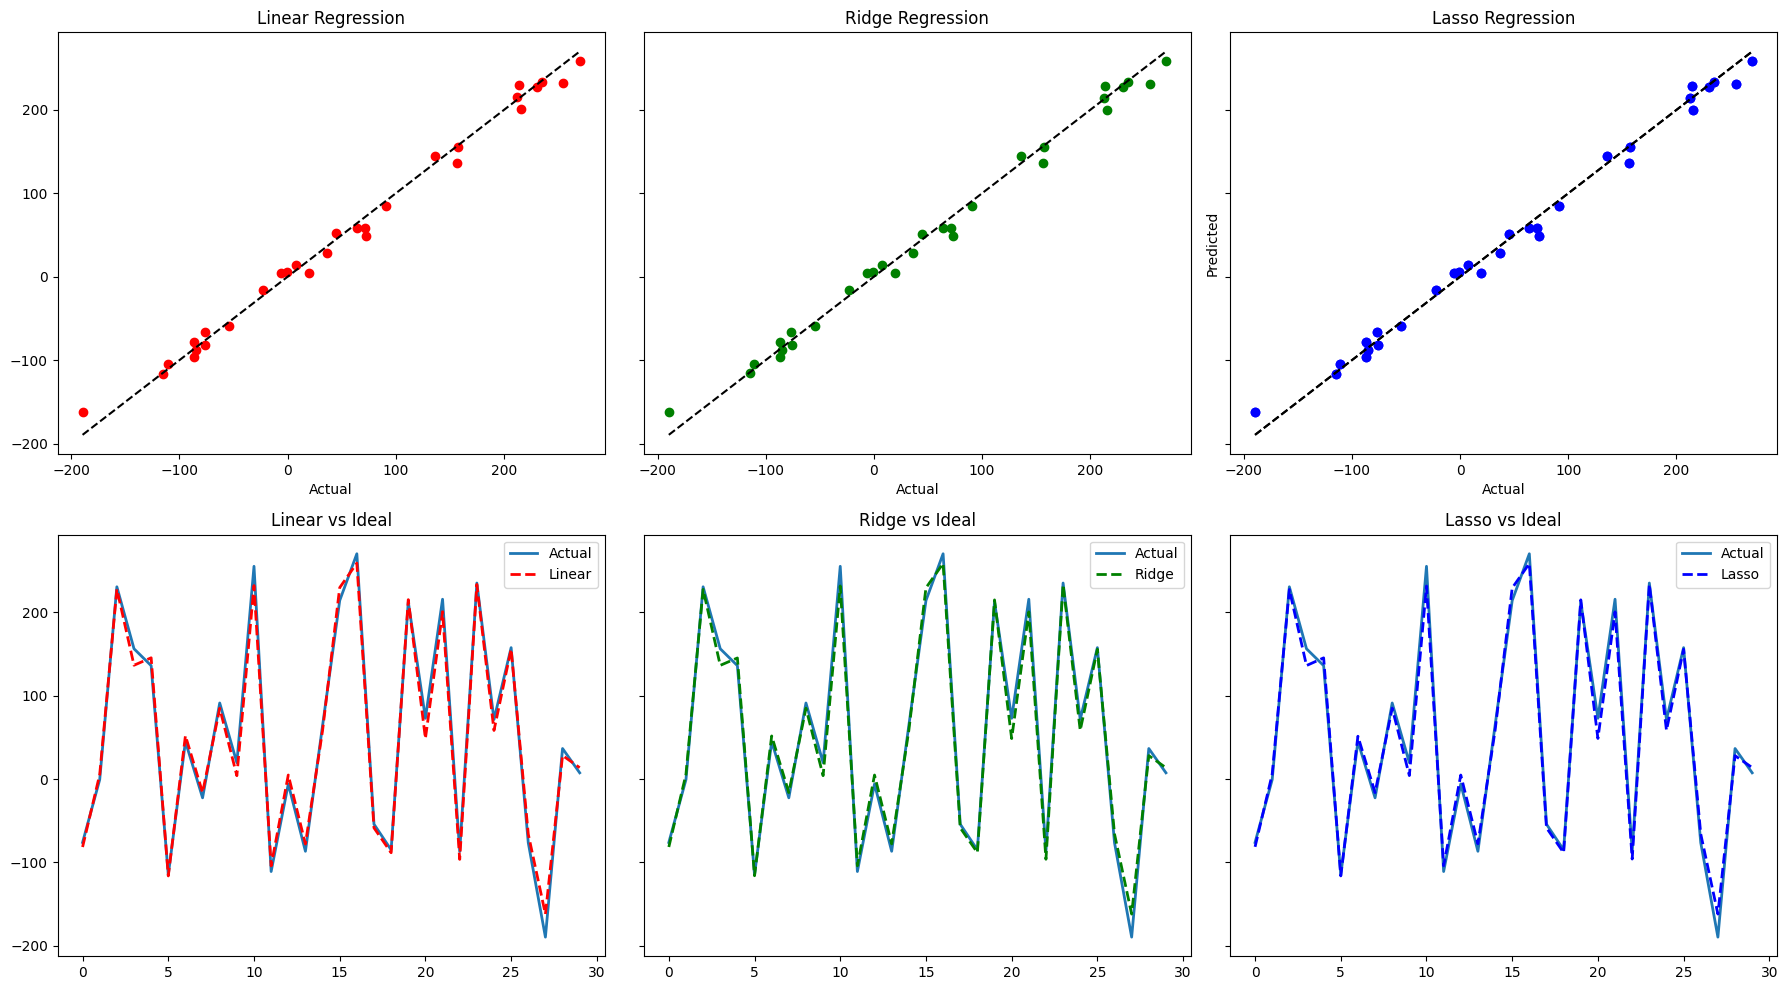

In [32]:
# Plot the predictions vs actuals
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

axes[0,0].scatter(y_test, y_pred_linear, color="red", label="Linear")
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,0].set_title("Linear Regression",)
axes[0,0].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

axes[0,1].scatter(y_test, y_pred_ridge, color="green", label="Ridge")
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,1].set_title("Ridge Regression",)
axes[0,1].set_xlabel("Actual",)

axes[0,2].scatter(y_test, y_pred_lasso, color="blue", label="Lasso")
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0,2].set_title("Lasso Regression",)
axes[0,2].set_xlabel("Actual",)
axes[0,2].set_ylabel("Predicted",)

# Line plots for predictions compared to actual and ideal predictions
axes[1,0].plot(y_test, label="Actual", lw=2)
axes[1,0].plot(y_pred_linear, '--', lw=2, color='red', label="Linear")
axes[1,0].set_title("Linear vs Ideal",)
axes[1,0].legend()

axes[1,1].plot(y_test, label="Actual", lw=2)
axes[1,1].plot(y_pred_ridge, '--', lw=2, color='green', label="Ridge")
axes[1,1].set_title("Ridge vs Ideal",)
axes[1,1].legend()

axes[1,2].plot(y_test, label="Actual", lw=2)
axes[1,2].plot(y_pred_lasso, '--', lw=2, color='blue', label="Lasso")
axes[1,2].set_title("Lasso vs Ideal",)
axes[1,2].legend()

plt.tight_layout()
plt.show()